# Predicting Student Performance in Mathematics

### The datasets used for this project is from the UCI Machine Learning Repository. The dataset and information about the attributes of this dataset can be found at https://archive.ics.uci.edu/ml/datasets/student+performance.


### The data is on the grades achieved in mathematics by secondary school students in Portugal. The data attributes include student grades, demographic, social and school-related features. The attribute G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. This project aims to predict the grades students will achieve using a Linear Model. 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

from sklearn import linear_model
from sklearn import metrics
from sklearn.utils import shuffle

In [17]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c636fc76e81e44bd8261ef4e4e5bb742 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tkEbNAGdlJKSx-AWSZ4igD308WKI0RTtelhNDLp_iMrw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c636fc76e81e44bd8261ef4e4e5bb742)

body = client_c636fc76e81e44bd8261ef4e4e5bb742.get_object(Bucket='gradeprediction-donotdelete-pr-p6qzw3fpw8wzp7',Key='student-mat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body,sep=";")

In [18]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Check for missing values

In [20]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### To determine which attributes to apply to the regression model we will be using a Heatmap to visualise the correlation between all attributes and G3.

<AxesSubplot:>

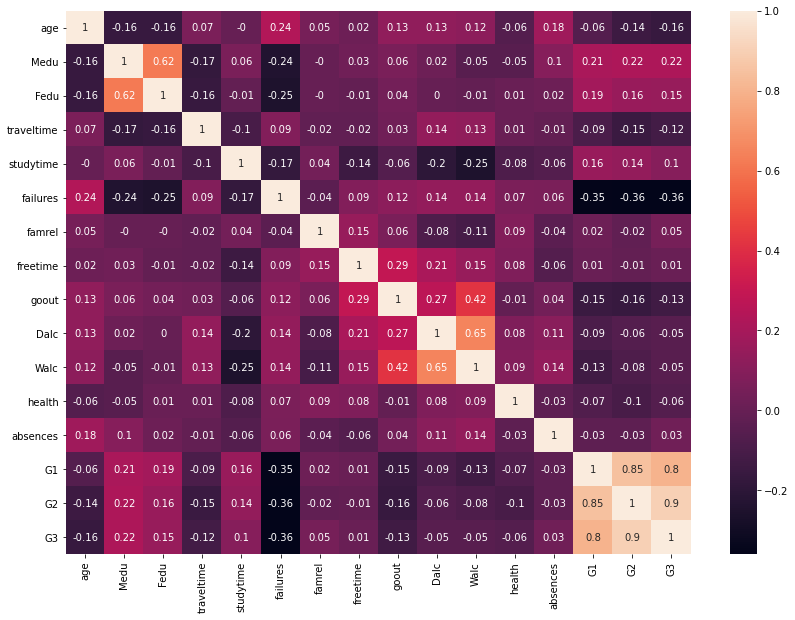

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr().round(2),annot=True)   

### Looking at this Heatmap we observe that the attributes with the most relevant correlation to G3 are G1,G2, Medu (mother's education)  and failures (number of past class failures). The data type of all of these attributes is integers.

In [23]:
data1 = data[['G1','G2','G3','failures','Medu']] # Theses are the attributes we are interested in
predict ='G3' # The attribute we want to predict
data1.head()

,G1,G2,G3,failures,Medu
0,5,6,6,0,4
1,5,5,6,0,1
2,7,8,10,3,1
3,15,14,15,0,4
4,6,10,10,0,3


In [29]:
x = np.array(data1.drop([predict],1))    # consists of all attributes in data1 but G3
y = np.array(data1[predict])             # only consists of the attribute G3

### Dividing the dateset into training and test dataset

In [30]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)   # We set the test data to be 10% of our dataset

### To run the regression model and find accuracy level 

In [31]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
acc= linear.score(x_test, y_test)  # accuracy of linear model as percentage 
acc

0.9357521369197119

###  This tells us that our linear model provides an accuracy of 93.6%. 

### Using the linear model we produced we can predict students grades.

In [50]:
prediction= linear.predict(x_test)

predict10 = prediction[10]        # Example of prediction result using our linear model
result10= y_test[10]

print('The linear model gives the grade {}. The actual grade is {}.'.format(predict10, result10))

The linear model gives the grade 11.817892336464558. The actual grade is 11.


### Scatterplot of actual grade versus predicted grade.

Text(0.5, 0, 'Actual grade (y_test)')

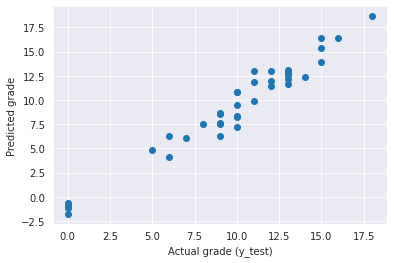

In [49]:
plt.scatter(y_test,prediction)
plt.ylabel('Predicted grade')
plt.xlabel('Actual grade (y_test)')

### Evaluating our linear model
#### We can evaluate our models performance by calculating the Mean Absolute Error, Mean Squared Error and the Root Mean Squared Error. 

In [57]:
print('Mean Absolute Error is', metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error is 0.9401850572976647


In [58]:
print('Mean Squared Error is', metrics.mean_squared_error(y_test,prediction))

Mean Squared Error is 1.3516144195515607


In [62]:
print('Root Mean Squared Error is', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error is 1.162589531843273


### The linear model that we produced with the attributes G1,G2, Medu and failures has an accuracy rate of 93.6%. To improve accuracy we need to apply different attributes to a model and then test the model with external datasets to test for robustness. 